In [2]:
import pandas as pd

# full path to the dataset
file_path = "sql.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                                            Sentence Label
0                  " or pg_sleep  (  __TIME__  )  --     1
1  create user name identified by pass123 tempora...     1
2   AND 1  =  utl_inaddr.get_host_address   (    ...     1
3   select * from users where id  =  '1' or @ @1 ...     1
4   select * from users where id  =  1 or 1#"  ( ...     1


In [ ]:
# Check the dataset's dimensions (rows and columns)
print(data.shape)

# Check the column names
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Check unique categories 
print(data['Label'].unique())

# Check value counts for each category
print(data['Label'].value_counts())

(30917, 2)
Index(['Sentence', 'Label'], dtype='object')
Sentence    206
Label       206
dtype: int64
['1' '0' ' grant resource to name' ' DROP TABLE Suppliers'
 '  EXEC SelectAllCustomers'
 " DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'" nan]
Label
0                                                                     19361
1                                                                     11346
 grant resource to name                                                   1
 DROP TABLE Suppliers                                                     1
  EXEC SelectAllCustomers                                                 1
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'        1
Name: count, dtype: int64


In [4]:
import pandas as pd

# Load the dataset
sql_data = pd.read_csv("sql.csv")  # Replace with the path to your SQL dataset

# Step 1: Remove rows with missing values
sql_data_cleaned = sql_data.dropna()

# Step 2: Inspect and standardize the 'Label' column
# Ensure that only valid labels (0 or 1) are present
valid_labels = ['0', '1', 0, 1]  # Adjust based on your dataset
sql_data_cleaned = sql_data_cleaned[sql_data_cleaned['Label'].isin(valid_labels)]

# Step 3: Convert the 'Label' column to integers (if it's not already)
sql_data_cleaned['Label'] = sql_data_cleaned['Label'].astype(int)

# Step 4: Clean the 'Sentence' column
# Remove any leading or trailing whitespaces
sql_data_cleaned['Sentence'] = sql_data_cleaned['Sentence'].str.strip()

# Optional: Further preprocessing steps (customize as needed)
# Convert all text to lowercase
sql_data_cleaned['Sentence'] = sql_data_cleaned['Sentence'].str.lower()

# Step 5: Verify the cleaned dataset
print(sql_data_cleaned.info())  # Check dataset structure
print(sql_data_cleaned.head())  # Preview the first few rows

# Save the cleaned data (optional)
sql_data_cleaned.to_csv("sqll.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 30707 entries, 0 to 30916
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30707 non-null  object
 1   Label     30707 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 719.7+ KB
None
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1


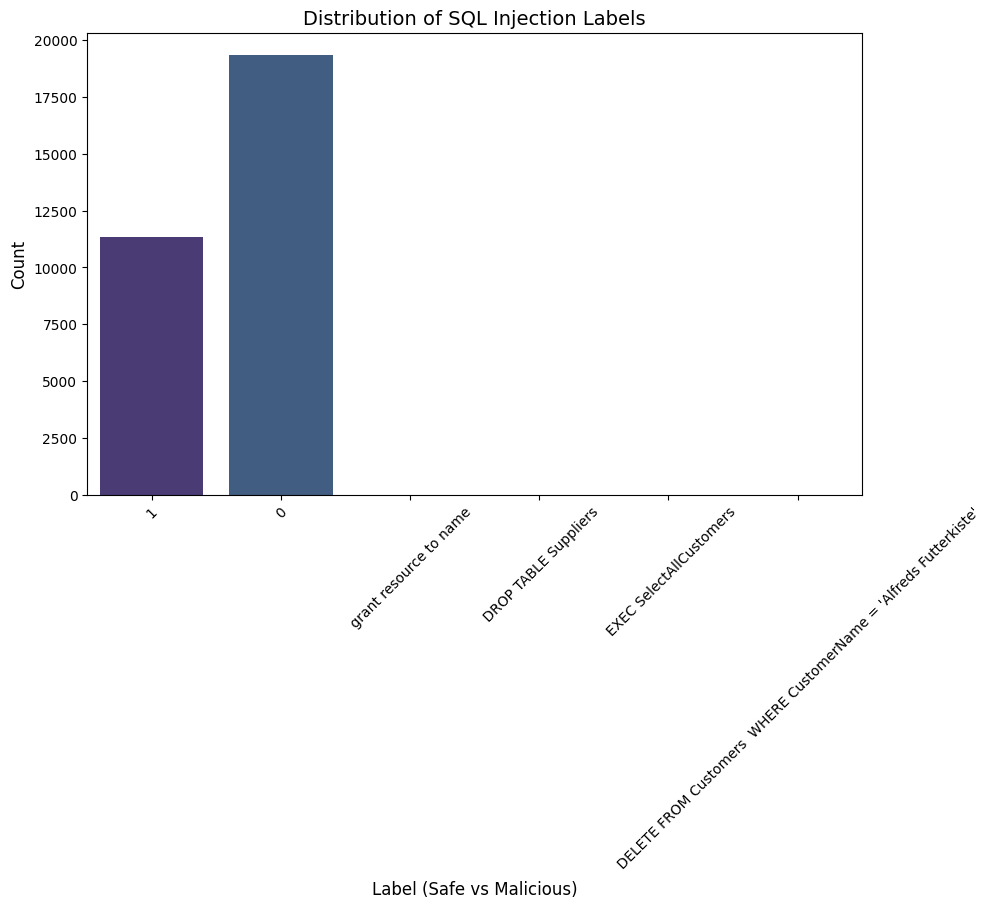

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "sqll.csv"
data = pd.read_csv(dataset_path)

# Plot the distribution of SQL injection labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Label', palette='viridis', hue='Label', dodge=False, legend=False)

# Customize plot
plt.title("Distribution of SQL Injection Labels", fontsize=14)
plt.xlabel("Label (Safe vs Malicious)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()



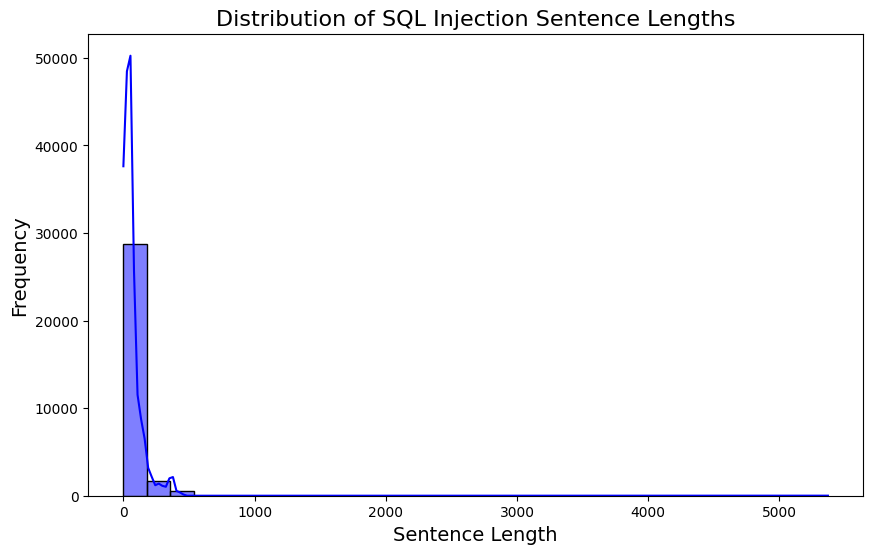

In [7]:
# Add a new column for sentence lengths
data['sentence_length'] = data['Sentence'].apply(len)

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['sentence_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of SQL Injection Sentence Lengths', fontsize=16)
plt.xlabel('Sentence Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = "sqll.csv"
data = pd.read_csv(file_path)

# Display the first few rows for understanding the structure
print(data.head())

# Step 1: Clean the 'Label' column
# Check unique values in the Label column
print("Unique values in Label column before cleaning:", data['Label'].unique())

# Convert the Label column to numeric, coercing invalid values to NaN
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')

# Drop rows with NaN values in the Label column
data.dropna(subset=['Label'], inplace=True)

# Convert the cleaned Label column to integer type
data['Label'] = data['Label'].astype(int)

# Verify the cleaned Label column
print("Unique values in Label column after cleaning:", data['Label'].unique())

# Step 2: Preprocess the text data
# Ensure the 'Sentence' column contains valid strings
data['Sentence'] = data['Sentence'].astype(str)

# Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']  # Target: Labels for SQL sentences

# Step 3: Convert text data to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Print first few vectorized features for verification
print("Feature names from TF-IDF Vectorizer:")
print(vectorizer.get_feature_names_out()[:10])  # Display top 10 feature names



                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1
Unique values in Label column before cleaning: [1 0]
Unique values in Label column after cleaning: [1 0]
Training data shape: (24565, 5000)
Testing data shape: (6142, 5000)
Feature names from TF-IDF Vectorizer:
['00' '000001' '000003' '00e' '01' '01e' '02e' '03e' '04e' '05e']


Initial missing values:
Sentence    1
Label       0
dtype: int64

Cleaned dataset missing values:
Sentence    0
Label       0
dtype: int64

Dataset preview:
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1

Naive Bayes Accuracy: 0.9452946922826441
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      3873
           1       0.97      0.88      0.92      2269

    accuracy                           0.95      6142
   macro avg       0.95      0.93      0.94      6142
weighted avg       0.95      0.95      0.94      6142



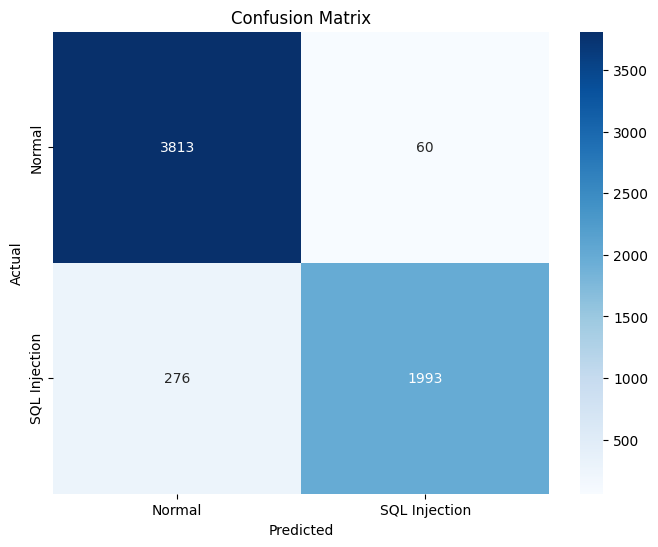

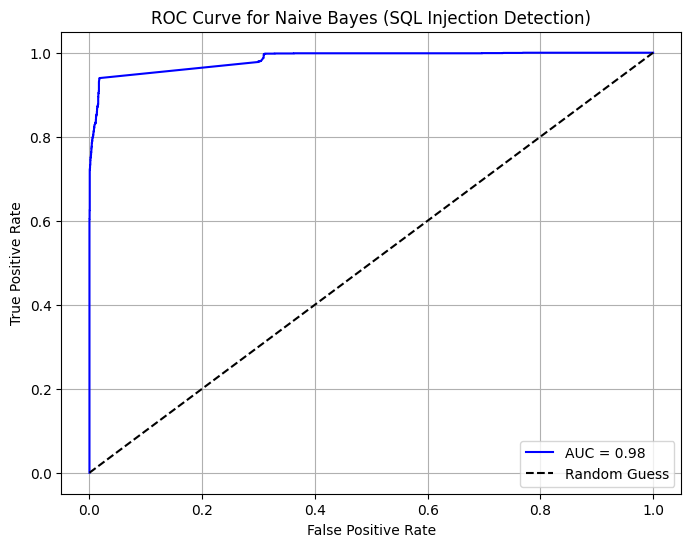

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sqll.csv"  # Update the path to your dataset
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
print(f"Initial missing values:\n{data.isnull().sum()}\n")

# Clean the 'Label' column
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')  # Convert to numeric, invalid values to NaN
data.dropna(subset=['Label'], inplace=True)  # Drop rows with NaN in 'Label'
data['Label'] = data['Label'].astype(int)  # Convert 'Label' to integers

# Clean the 'Sentence' column
data['Sentence'] = data['Sentence'].str.strip()  # Remove leading/trailing spaces
data.dropna(subset=['Sentence'], inplace=True)  # Drop rows with NaN in 'Sentence'
data = data[data['Sentence'] != ""]  # Drop rows where 'Sentence' is empty

print(f"Cleaned dataset missing values:\n{data.isnull().sum()}\n")
print(f"Dataset preview:\n{data.head()}\n")

# Step 2: Prepare Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']     # Target: SQL injection detection (1: Injection, 0: Normal)

# Step 3: Vectorize the Text Data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred_nb = nb_model.predict(X_test)  # Predicted labels
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Print evaluation metrics
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'SQL Injection'], yticklabels=['Normal', 'SQL Injection'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC (Area Under Curve)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Baseline
plt.title('ROC Curve for Naive Bayes (SQL Injection Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



Initial missing values:
Sentence    1
Label       0
dtype: int64

Cleaned dataset missing values:
Sentence    0
Label       0
dtype: int64

Dataset preview:
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1

Random Forest Accuracy: 0.9575056984695539
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3873
           1       0.99      0.89      0.94      2269

    accuracy                           0.96      6142
   macro avg       0.97      0.94      0.95      6142
weighted avg       0.96      0.96      0.96      6142



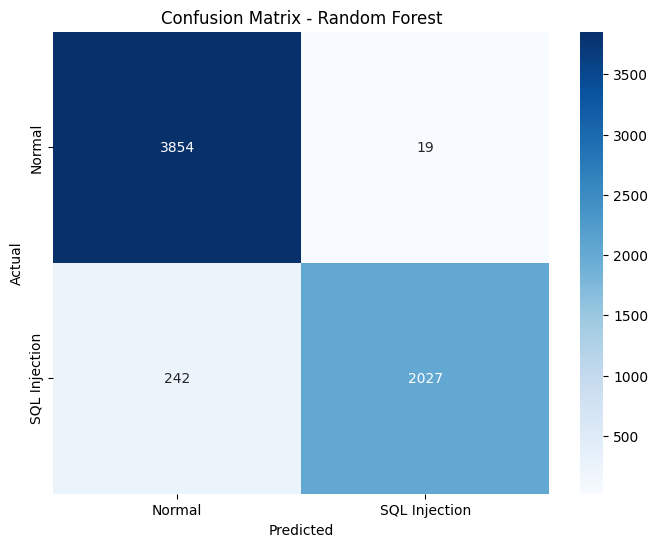

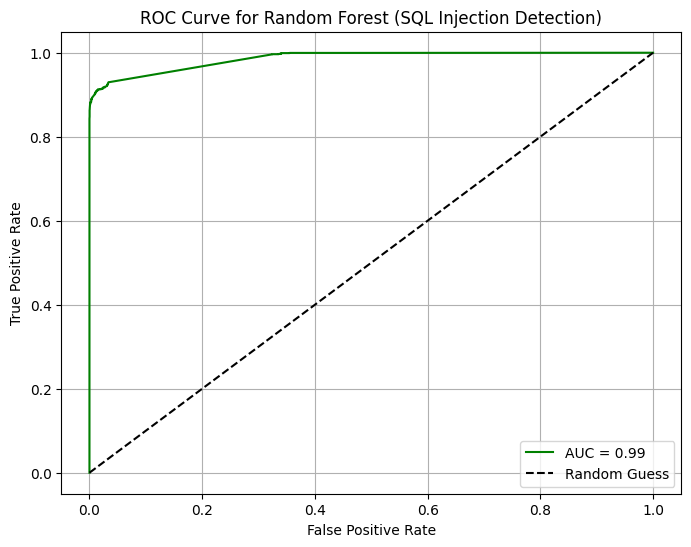

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sqll.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
print(f"Initial missing values:\n{data.isnull().sum()}\n")

# Clean the 'Label' column
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')  # Convert to numeric, invalid values to NaN
data.dropna(subset=['Label'], inplace=True)  # Drop rows with NaN in 'Label'
data['Label'] = data['Label'].astype(int)  # Convert 'Label' to integers

# Clean the 'Sentence' column
data['Sentence'] = data['Sentence'].str.strip()  # Remove leading/trailing spaces
data.dropna(subset=['Sentence'], inplace=True)  # Drop rows with NaN in 'Sentence'
data = data[data['Sentence'] != ""]  # Drop rows where 'Sentence' is empty

print(f"Cleaned dataset missing values:\n{data.isnull().sum()}\n")
print(f"Dataset preview:\n{data.head()}\n")

# Step 2: Prepare Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']     # Target: SQL injection detection (1: Injection, 0: Normal)

# Step 3: Vectorize the Text Data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees
rf_model.fit(X_train, y_train)  # Train the model

# Step 6: Evaluate the Model
y_pred_rf = rf_model.predict(X_test)  # Predicted labels
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Print evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'SQL Injection'], yticklabels=['Normal', 'SQL Injection'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)  # Compute False Positive Rate and True Positive Rate
roc_auc_rf = auc(fpr, tpr)  # Compute AUC (Area Under Curve)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_rf:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Baseline
plt.title('ROC Curve for Random Forest (SQL Injection Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Initial missing values:
Sentence    1
Label       0
dtype: int64

Cleaned dataset missing values:
Sentence    0
Label       0
dtype: int64

Dataset preview:
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1

Logistic Regression Accuracy: 0.9133832627808531
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      3873
           1       0.99      0.77      0.87      2269

    accuracy                           0.91      6142
   macro avg       0.94      0.88      0.90      6142
weighted avg       0.92      0.91      0.91      6142



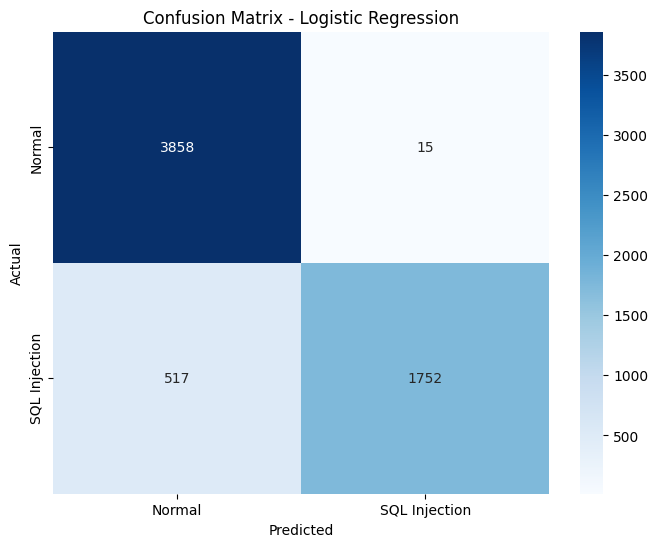

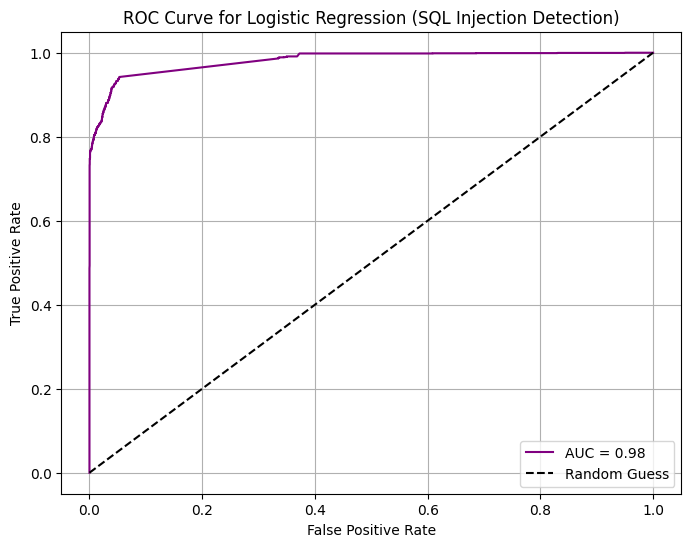

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sqll.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
print(f"Initial missing values:\n{data.isnull().sum()}\n")

# Clean the 'Label' column
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')  # Convert to numeric, invalid values to NaN
data.dropna(subset=['Label'], inplace=True)  # Drop rows with NaN in 'Label'
data['Label'] = data['Label'].astype(int)  # Convert 'Label' to integers

# Clean the 'Sentence' column
data['Sentence'] = data['Sentence'].str.strip()  # Remove leading/trailing spaces
data.dropna(subset=['Sentence'], inplace=True)  # Drop rows with NaN in 'Sentence'
data = data[data['Sentence'] != ""]  # Drop rows where 'Sentence' is empty

print(f"Cleaned dataset missing values:\n{data.isnull().sum()}\n")
print(f"Dataset preview:\n{data.head()}\n")

# Step 2: Prepare Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']     # Target: SQL injection detection (1: Injection, 0: Normal)

# Step 3: Vectorize the Text Data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Initialize Logistic Regression
log_reg_model.fit(X_train, y_train)  # Train the model

# Step 6: Evaluate the Model
y_pred_lr = log_reg_model.predict(X_test)  # Predicted labels
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Print evaluation metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'SQL Injection'], yticklabels=['Normal', 'SQL Injection'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)  # Compute False Positive Rate and True Positive Rate
roc_auc_lr = auc(fpr, tpr)  # Compute AUC (Area Under Curve)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lr:.2f}', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Baseline
plt.title('ROC Curve for Logistic Regression (SQL Injection Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()




Initial missing values:
Sentence    1
Label       0
dtype: int64

Cleaned dataset missing values:
Sentence    0
Label       0
dtype: int64

Dataset preview:
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1

SVM Accuracy: 0.9246173884728102
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      3873
           1       0.99      0.80      0.89      2269

    accuracy                           0.92      6142
   macro avg       0.94      0.90      0.92      6142
weighted avg       0.93      0.92      0.92      6142



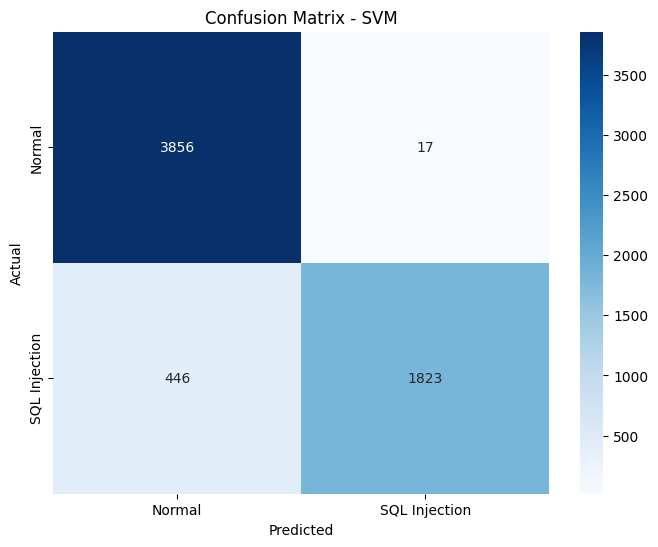

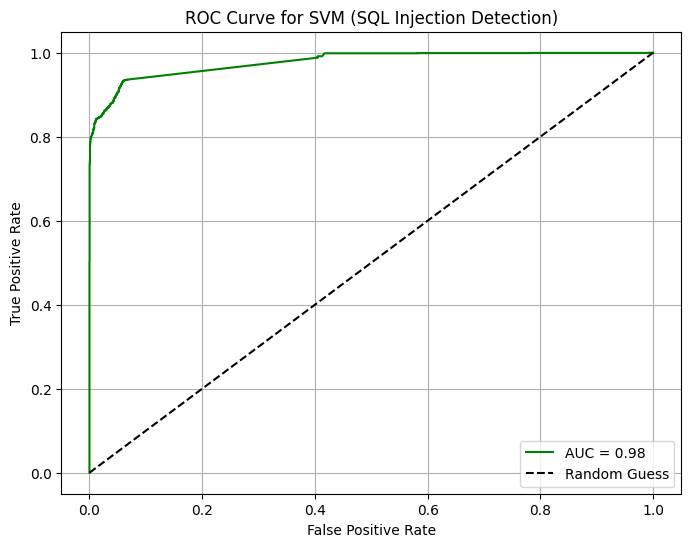

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sqll.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
print(f"Initial missing values:\n{data.isnull().sum()}\n")

# Ensure 'Label' column is numeric
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')  # Convert invalid values to NaN
data.dropna(subset=['Label'], inplace=True)  # Drop rows with NaN in 'Label'
data['Label'] = data['Label'].astype(int)  # Convert 'Label' to integers

# Ensure 'Sentence' column is clean
data['Sentence'] = data['Sentence'].str.strip()  # Remove leading/trailing spaces
data.dropna(subset=['Sentence'], inplace=True)  # Drop rows with NaN in 'Sentence'
data = data[data['Sentence'] != ""]  # Drop rows where 'Sentence' is empty

# Verify data after cleaning
print(f"Cleaned dataset missing values:\n{data.isnull().sum()}\n")
print(f"Dataset preview:\n{data.head()}\n")

# Step 2: Prepare Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']     # Target: SQL injection detection (1: Injection, 0: Normal)

# Step 3: Vectorize the Text Data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure there are no NaN values in the target
if y_train.isnull().any() or y_test.isnull().any():
    raise ValueError("NaN values found in target labels. Check data preprocessing.")

# Step 5: Train SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Use linear kernel and enable probability estimates
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print evaluation metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'SQL Injection'], yticklabels=['Normal', 'SQL Injection'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for SVM (SQL Injection Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Initial missing values:
Sentence    1
Label       0
dtype: int64

Cleaned dataset missing values:
Sentence    0
Label       0
dtype: int64

Dataset preview:
                                            Sentence  Label
0                  " or pg_sleep  (  __time__  )  --      1
1  create user name identified by pass123 tempora...      1
2  and 1  =  utl_inaddr.get_host_address   (    (...      1
3  select * from users where id  =  '1' or @ @1  ...      1
4  select * from users where id  =  1 or 1#"  (  ...      1

Decision Tree Accuracy: 0.9576685118853794
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      3873
           1       0.99      0.90      0.94      2269

    accuracy                           0.96      6142
   macro avg       0.97      0.94      0.95      6142
weighted avg       0.96      0.96      0.96      6142



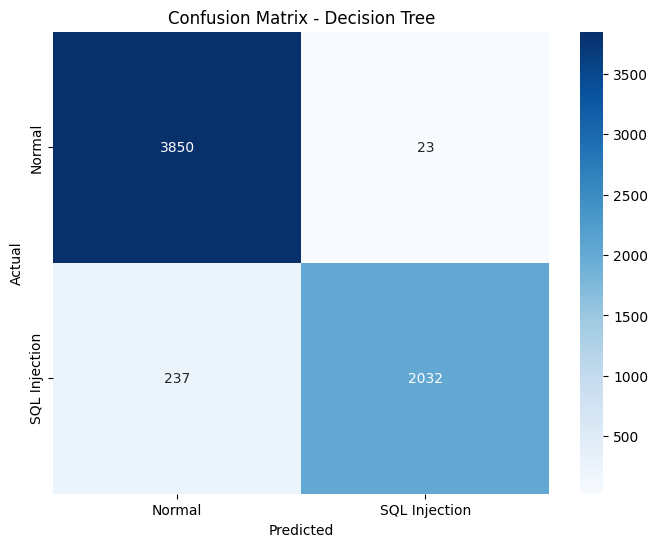

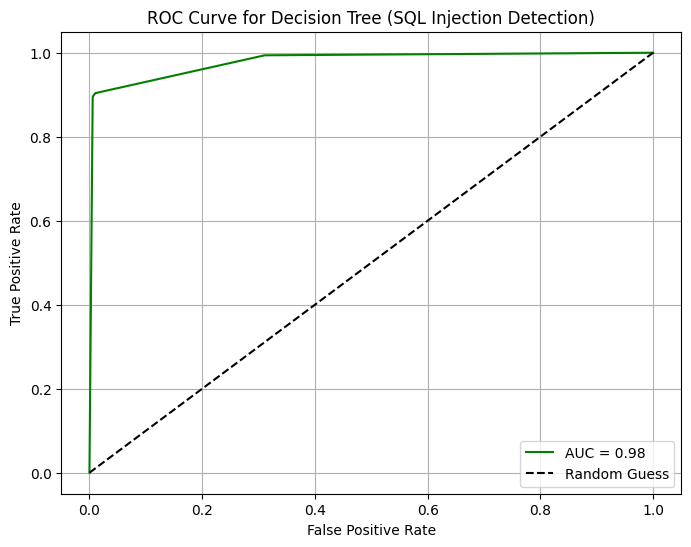

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "sqll.csv"  # Update with your dataset path
data = pd.read_csv(file_path)

# Step 1: Data Cleaning
print(f"Initial missing values:\n{data.isnull().sum()}\n")

# Ensure 'Label' column is numeric
data['Label'] = pd.to_numeric(data['Label'], errors='coerce')  # Convert invalid values to NaN
data.dropna(subset=['Label'], inplace=True)  # Drop rows with NaN in 'Label'
data['Label'] = data['Label'].astype(int)  # Convert 'Label' to integers

# Ensure 'Sentence' column is clean
data['Sentence'] = data['Sentence'].str.strip()  # Remove leading/trailing spaces
data.dropna(subset=['Sentence'], inplace=True)  # Drop rows with NaN in 'Sentence'
data = data[data['Sentence'] != ""]  # Drop rows where 'Sentence' is empty

# Verify data after cleaning
print(f"Cleaned dataset missing values:\n{data.isnull().sum()}\n")
print(f"Dataset preview:\n{data.head()}\n")

# Step 2: Prepare Features (X) and Target (y)
X = data['Sentence']  # Features: SQL sentences
y = data['Label']     # Target: SQL injection detection (1: Injection, 0: Normal)

# Step 3: Vectorize the Text Data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features for efficiency
X = vectorizer.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure there are no NaN values in the target
if y_train.isnull().any() or y_test.isnull().any():
    raise ValueError("NaN values found in target labels. Check data preprocessing.")

# Step 5: Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)  # Instantiate the decision tree model
dt_model.fit(X_train, y_train)  # Train the model

# Step 6: Evaluate the Model
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print evaluation metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'SQL Injection'], yticklabels=['Normal', 'SQL Injection'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve for Decision Tree (SQL Injection Detection)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [1]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "sqll.csv"
data = pd.read_csv(file_path)

# Ensure data quality
if 'Sentence' not in data.columns or 'Label' not in data.columns:
    raise ValueError("Dataset must contain 'Sentence' and 'Label' columns.")

# Drop missing values
data = data.dropna(subset=['Sentence', 'Label'])

# Ensure proper data types
data['Sentence'] = data['Sentence'].astype(str)
data['Label'] = data['Label'].astype(int)

# Extract features and labels
queries = data['Sentence']
labels = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(queries, labels, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_transformed, y_train)

# Save the trained Decision Tree model
with open('dt_model_sql_injection.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)

# Save the fitted TF-IDF vectorizer
with open('vectorizer_sql_injection.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer trained and saved successfully!")


Model and vectorizer trained and saved successfully!
